# **Lecture Note: Discretization of the Geometric Brownian Motion (GBM) Model**

## **1. Introduction**
The **Geometric Brownian Motion (GBM)** is a widely used stochastic process in financial mathematics for modeling the dynamics of stock prices. It is particularly useful in the **Black–Scholes** model for option pricing. GBM assumes that the percentage change in stock price follows a normal distribution and exhibits continuous compounding with constant drift and volatility.

---

## **2. Theoretical Background**

The **continuous-time stochastic differential equation (SDE)** for the GBM is given by:

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

where:  
- $ S_t $: Stock price at time $ t $.  
- $ \mu $: Drift coefficient (expected return).  
- $ \sigma $: Volatility coefficient (standard deviation of returns).  
- $ W_t $: Standard Brownian motion (Wiener process).

---

## **3. Discretization of GBM**

To simulate GBM numerically, we discretize the continuous SDE using the **Euler-Maruyama method**, resulting in:

$$
S_{t+\Delta t} = S_t \exp\left( \left( \mu - \frac{1}{2}\sigma^2 \right)\Delta t + \sigma \sqrt{\Delta t} \, Z_t \right)
$$

where $ Z_t \sim N(0,1) $ (standard normal distribution).

### **Key Steps in Derivation:**
1. **Log Transformation:**
   $$
   d(\ln S_t) = \left(\mu - \frac{1}{2}\sigma^2\right) dt + \sigma \, dW_t
   $$

2. **Integration Over Time Interval:**
   $$
   \ln(S_{t+\Delta t}) - \ln(S_t) = \left(\mu - \frac{1}{2}\sigma^2\right)\Delta t + \sigma \sqrt{\Delta t} \, Z_t
   $$

3. **Exponential Transformation:**
   $$
   S_{t+\Delta t} = S_t \exp\left( \left(\mu - \frac{1}{2}\sigma^2\right)\Delta t + \sigma \sqrt{\Delta t} \, Z_t \right)
   $$

---

## **4. Python Code Example**

The following **Python code** simulates multiple stock price paths using the discretized GBM equation:

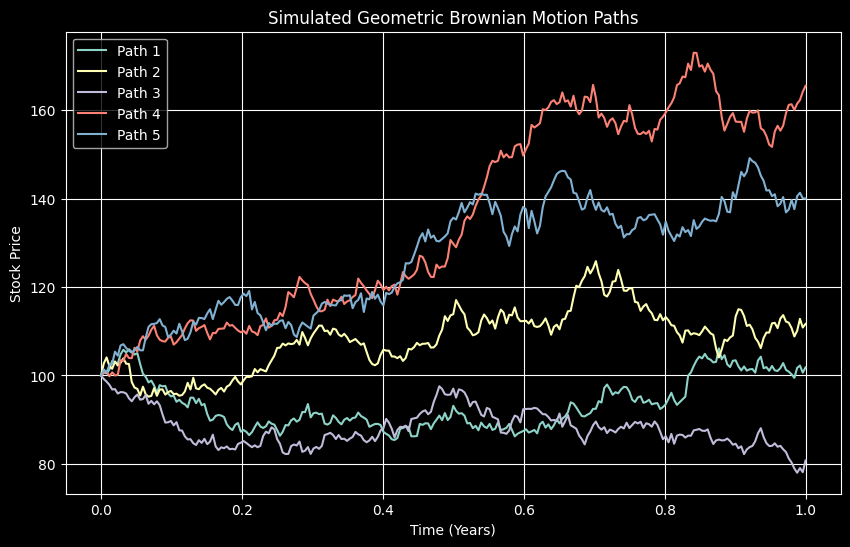

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100       # Initial stock price
mu = 0.05      # Drift coefficient
sigma = 0.2    # Volatility
T = 1.0        # Time horizon (1 year)
N = 252        # Number of time steps (daily data)
dt = T / N     # Time step
n_simulations = 5  # Number of simulated paths

# Time vector
time_grid = np.linspace(0, T, N+1)

# Simulate GBM paths
np.random.seed(42)  # For reproducibility
S = np.zeros((n_simulations, N+1))
S[:, 0] = S0

for i in range(n_simulations):
    for t in range(1, N+1):
        Z = np.random.normal(0, 1)
        S[i, t] = S[i, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Plot the simulated paths
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(time_grid, S[i], label=f'Path {i+1}')

plt.title('Simulated Geometric Brownian Motion Paths')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

---

## **5. Interpretation of Results**

- The plot generated by the above code displays **multiple stock price paths**, each influenced by:
  - **Drift ($\mu$)**: The expected growth rate of the stock.
  - **Volatility ($\sigma$)**: The degree of fluctuation around the expected path.
  - **Stochastic term**: Introduces randomness using standard normal variables $ Z_t $.

- The **exponential formulation** ensures that the stock prices remain **positive**, a key property of real-world asset prices.

---

## **6. Applications of GBM in Finance**
- **Option Pricing:** Underlies the **Black–Scholes** option pricing model.
- **Risk Management:** Simulates future price paths to assess risk.
- **Portfolio Optimization:** Assesses performance under stochastic market conditions.

---

## ✅ **Summary**
- The **GBM model** captures essential characteristics of stock price movements.  
- **Discretization** via the **Euler-Maruyama method** allows for simulation in **Python** using **Monte Carlo methods**.  
- The approach demonstrates how **drift** and **volatility** impact stock prices over time, reflecting both **deterministic trends** and **random fluctuations**.